# Project 2：NASA Data Acquisation, Visualization, and Analysis
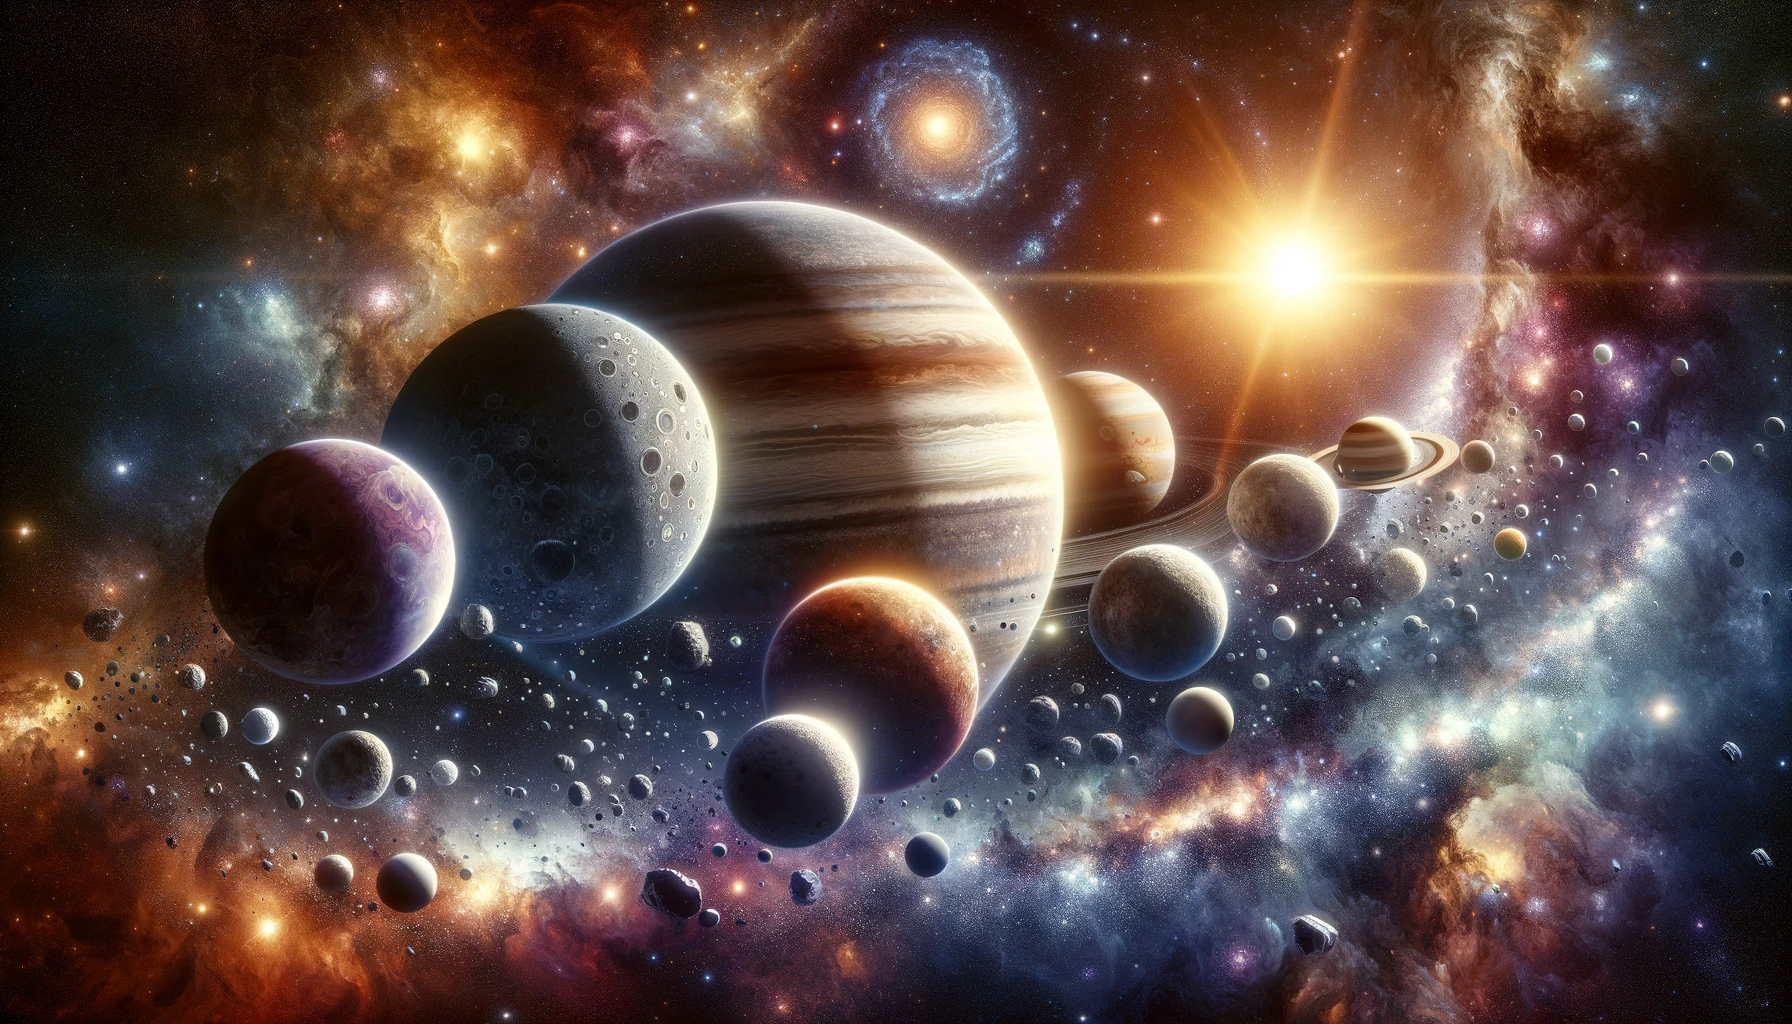

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the NASA API and Data Collection

- Run the Python script below to fetch data about **Near Earth Objects (NEOs)**.
- Extract and understand the different pieces of data provided for each NEO.

In [2]:
import sys
import subprocess

# Function to install a package
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check if gdown is installed, and install it if not
try:
    import gdown
except ImportError:
    install('gdown')
    import gdown

import pickle

In [3]:
# Google Drive file ID
file_id = '1iW47qh3E2ccZVQ4fOs9-UP0xNEjhNae2'
# URL to the file
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output file name
output = 'file.pkl'

# Download the file
gdown.download(url, output, quiet=False)

# Load the pickle file
with open(output, 'rb') as f:
    data = pickle.load(f)

Downloading...
From: https://drive.google.com/uc?export=download&id=1iW47qh3E2ccZVQ4fOs9-UP0xNEjhNae2
To: c:\Users\chris\Desktop\62444\62444-Project-Course-main\file.pkl
100%|██████████| 5.26M/5.26M [00:00<00:00, 16.9MB/s]


*The code (commented out) below is for getting the data for arbitrary time span. If you would like some other data rather than the provided data above, feel free to try. But this is not mandatory.*

In order to use it, you need to get an API KEY from the website https://api.nasa.gov/.


In [4]:
# import requests
# import time
# from datetime import datetime, timedelta
# from getpass import getpass

# # Set your NASA API KEY, this step asks you to enter your API KEY.
# # (The input box may be float in the top on your editor.)
# api_key = getpass()

In [5]:
# # Set the start and end dates for the data you want to fetch
# start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
# end_date = start_date + timedelta(days=365)  # 1 year later

# # Initialize a list to store the data
# data = []

# # Fetch data from the NASA API 7 days at a time
# # The introduction of the API is on https://api.nasa.gov, under "Browse APIs" -> "Asteroids NeoWs"
# # You can look into the example query in the link below to see what the data look like:
# # https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY
# current_date = start_date
# while current_date < end_date:
#     next_date = min(current_date + timedelta(days=7), end_date)
#     response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
#     data.append(response.json())
#     current_date = next_date
#     time.sleep(1)  # To avoid hitting the rate limit

# # Now 'data' contains the NEO data for the 1-year period


In [6]:
data[0]

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-08&end_date=2022-01-15&detailed=false&api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2021-12-25&end_date=2022-01-01&detailed=false&api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-01&end_date=2022-01-08&detailed=false&api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17'},
 'element_count': 125,
 'near_earth_objects': {'2022-01-07': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2216523?api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17'},
    'id': '2216523',
    'neo_reference_id': '2216523',
    'name': '216523 (2001 HY7)',
    'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523',
    'absolute_magnitude_h': 20.7,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1925550782,
      'estimated_diameter_max': 0.4305662442},
     'meters': {'es

In [7]:
# Check the date coverage of your data.
dates_contained_in_data = []
for d in data:
    dates_contained_in_data += list(d['near_earth_objects'].keys())

print(sorted(dates_contained_in_data))


['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022

In [8]:
dates_contained_in_data

['2022-01-07',
 '2022-01-08',
 '2022-01-03',
 '2022-01-04',
 '2022-01-05',
 '2022-01-06',
 '2022-01-01',
 '2022-01-02',
 '2022-01-08',
 '2022-01-09',
 '2022-01-14',
 '2022-01-15',
 '2022-01-10',
 '2022-01-11',
 '2022-01-12',
 '2022-01-13',
 '2022-01-18',
 '2022-01-19',
 '2022-01-15',
 '2022-01-16',
 '2022-01-17',
 '2022-01-21',
 '2022-01-22',
 '2022-01-20',
 '2022-01-29',
 '2022-01-25',
 '2022-01-26',
 '2022-01-27',
 '2022-01-28',
 '2022-01-22',
 '2022-01-23',
 '2022-01-24',
 '2022-01-29',
 '2022-02-05',
 '2022-02-04',
 '2022-02-01',
 '2022-02-03',
 '2022-02-02',
 '2022-01-30',
 '2022-01-31',
 '2022-02-09',
 '2022-02-08',
 '2022-02-05',
 '2022-02-07',
 '2022-02-06',
 '2022-02-12',
 '2022-02-11',
 '2022-02-10',
 '2022-02-19',
 '2022-02-16',
 '2022-02-15',
 '2022-02-18',
 '2022-02-17',
 '2022-02-12',
 '2022-02-14',
 '2022-02-13',
 '2022-02-19',
 '2022-02-26',
 '2022-02-23',
 '2022-02-22',
 '2022-02-25',
 '2022-02-24',
 '2022-02-21',
 '2022-02-20',
 '2022-02-27',
 '2022-03-05',
 '2022-02-

In [9]:
from src.utils import get_a_random_chunk_property

In [10]:
get_a_random_chunk_property(data)

date: 2022-12-07
NEO name: (2017 LE1)
is_potentially_hazardous_asteroid: False


### Task 2: Data Analysis

For the remaining tasks, you have to organize the data as pd.DataFrame so as to suit the specific need in each task. This part may require a considerably amount of efforts, which is normal in data science and analytics works.

**Remark**. This part is **coding intensive**. There is **NOT** any magic way to extract the data by one or two lines of code. Instead, you're expected to write your own code for this purpose.

- Calculate the average size of the NEOs for each day.（You have to fetch the corresponding each day's NEO size information from "data" by writing your own code)
- Determine the proportion of NEOs that are potentially hazardous.
- Find the NEO with the closest approach distance for each day.
- Use statistical methods to analyze the data. Calculate the mean, median, mode, and standard deviation of the NEO sizes. Besides, define at least two other statistic and compute them for anlayzing the data further. 
- Use statistical methods to determine if the size of a NEO is correlated with whether it is potentially hazardous.

In [11]:
# Write your code and markdowns

# To convert 'data' into pd.Dataframe, first we will Check the type of the data by inspecting it
print(type(data))
print(len(data))  # Check the number of elements in the list
print(data[:5])   # Prints the first 5 elements of the list to see its structure


<class 'list'>
53
[{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-08&end_date=2022-01-15&detailed=false&api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17', 'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2021-12-25&end_date=2022-01-01&detailed=false&api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17', 'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-01&end_date=2022-01-08&detailed=false&api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17'}, 'element_count': 125, 'near_earth_objects': {'2022-01-07': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2216523?api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17'}, 'id': '2216523', 'neo_reference_id': '2216523', 'name': '216523 (2001 HY7)', 'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523', 'absolute_magnitude_h': 20.7, 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1925550782, 'estimated_diameter_max': 0.4305662442}, 'meters': {'estimated_diameter_min':

Flattening the data in this code serves the purpose of structuring nested data into a format suitable for analysis, such as a tabular structure (rows and columns).

In [12]:
import pandas as pd

# Initializing an empty list to store all flattened asteroid data
all_flattened_data = []

# Loop through each entry in `data`
for d in data:
    # Extract 'near_earth_objects' from the current dictionary
    near_earth_objects = d['near_earth_objects']
    
    # Iterate through dates and asteroids
    for date, asteroids in near_earth_objects.items():
        for asteroid in asteroids:
            # Extract relevant fields
            asteroid_data = {
                "id": asteroid['id'],
                "name": asteroid['name'],
                "close_approach_date": date,  # Ensure date is captured
                "miss_distance_km": asteroid['close_approach_data'][0]['miss_distance']['kilometers'],
                "relative_velocity_kph": asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_hour'],
                "absolute_magnitude": asteroid['absolute_magnitude_h'],
                "estimated_diameter_min_km": asteroid['estimated_diameter']['kilometers']['estimated_diameter_min'],
                "estimated_diameter_max_km": asteroid['estimated_diameter']['kilometers']['estimated_diameter_max'],
                "is_potentially_hazardous": asteroid['is_potentially_hazardous_asteroid']
            }
            # Append to the aggregated list
            all_flattened_data.append(asteroid_data)

# Convert the aggregated list to a DataFrame
df = pd.DataFrame(all_flattened_data)

# Display the DataFrame for overview
print(df)



            id                 name close_approach_date    miss_distance_km  \
0      2216523    216523 (2001 HY7)          2022-01-07  58057611.275823875   
1      2494697   494697 (2004 SW55)          2022-01-07  20026765.127740803   
2      2496860  496860 (1999 XL136)          2022-01-07  13396095.053152763   
3      3311963           (2006 AL4)          2022-01-07   14239203.68058826   
4      3401388            (2008 CO)          2022-01-07  30934770.472739391   
...        ...                  ...                 ...                 ...   
7909  54338714            (2023 AW)          2022-12-31   1484769.750474936   
7910  54339156           (2023 AC2)          2022-12-31   1640613.675622537   
7911  54339184            (2023 BE)          2022-12-31  20116937.517770927   
7912  54339974           (2023 BJ2)          2022-12-31   6353440.522869703   
7913  54340108           (2023 BH4)          2022-12-31  41551677.316768108   

     relative_velocity_kph  absolute_magnitude  est

In [13]:
# We would like to clean up the data before handling it further, so we look at the overview of the dataframe:
print(df.info())         # Checks data types and non-null counts
print(df.head())         # Displays the first few rows
print(df.describe())     # Summary statistics for numerical columns
print(df.isnull().sum()) # Count of missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7914 entries, 0 to 7913
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         7914 non-null   object 
 1   name                       7914 non-null   object 
 2   close_approach_date        7914 non-null   object 
 3   miss_distance_km           7914 non-null   object 
 4   relative_velocity_kph      7914 non-null   object 
 5   absolute_magnitude         7914 non-null   float64
 6   estimated_diameter_min_km  7914 non-null   float64
 7   estimated_diameter_max_km  7914 non-null   float64
 8   is_potentially_hazardous   7914 non-null   bool   
dtypes: bool(1), float64(3), object(5)
memory usage: 502.5+ KB
None
        id                 name close_approach_date    miss_distance_km  \
0  2216523    216523 (2001 HY7)          2022-01-07  58057611.275823875   
1  2494697   494697 (2004 SW55)          2022-01-07  2002676

From the above output, we can see that there are no missing values in the DataFrame - all collumms are populated with data.
Some of columns have the wrong data type, so we will convert them to the correct data type. 
Columns like close_approach_date, miss_distance_km, and relative_velocity_kph are stored as object types (strings). 
These should be converted to datetime / numeric types for proper analysis.


In [14]:

# Convert 'close_approach_date' to datetime
df['close_approach_date'] = pd.to_datetime(df['close_approach_date'], errors='coerce')
# pd.to_datetime converts a column to datetime format.
# Using errors='coerce' ensures that invalid date values are converted to NaT (Not a Time)

# Convert 'miss_distance_km' to float
df['miss_distance_km'] = pd.to_numeric(df['miss_distance_km'], errors='coerce')
# pd.to__numeric converts a column to numeric format.
# errors='coerce' replaces invalid numeric values with NaN, allowing for easier filtering and cleaning.

# Convert 'relative_velocity_kph' to float
df['relative_velocity_kph'] = pd.to_numeric(df['relative_velocity_kph'], errors='coerce')
# pd.to__numeric converts a column to numeric format.

In [15]:
# We verify that the data types have been converted correctly
print(df.info())  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7914 entries, 0 to 7913
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         7914 non-null   object        
 1   name                       7914 non-null   object        
 2   close_approach_date        7914 non-null   datetime64[ns]
 3   miss_distance_km           7914 non-null   float64       
 4   relative_velocity_kph      7914 non-null   float64       
 5   absolute_magnitude         7914 non-null   float64       
 6   estimated_diameter_min_km  7914 non-null   float64       
 7   estimated_diameter_max_km  7914 non-null   float64       
 8   is_potentially_hazardous   7914 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(5), object(2)
memory usage: 502.5+ KB
None


The relevant rows have successfully changed. 

In [16]:
# Checking for missing values in the dataset after converting the data types, just to be sure
print(df.isnull().sum())
print(df.isnull().values.any())


id                           0
name                         0
close_approach_date          0
miss_distance_km             0
relative_velocity_kph        0
absolute_magnitude           0
estimated_diameter_min_km    0
estimated_diameter_max_km    0
is_potentially_hazardous     0
dtype: int64
False


Returns 0 for each row, and Returns 'False' = no missing values in the dataset.
Before checking for outliers in the dataset we will first look at the summary statistics of the numerical columns

In [17]:
print(df[['miss_distance_km', 'relative_velocity_kph', 'absolute_magnitude']].describe())



       miss_distance_km  relative_velocity_kph  absolute_magnitude
count      7.914000e+03            7914.000000         7914.000000
mean       3.054989e+07           44753.681727           24.152130
std        2.329708e+07           23628.468982            2.731265
min        1.484454e+04            1905.204352           14.680000
25%        8.360888e+06           26902.412382           22.292500
50%        2.750149e+07           40475.387139           24.440000
75%        5.108493e+07           58799.831186           26.100000
max        7.479146e+07          187221.073334           32.950000



**Key Metrics in the Output**:

**count**: 
The total number of non-null entries in each column. In this case, all columns have 125 entries, so there are no missing values.

**mean**: The average value of the column.

**std (Standard Deviation)**: A measure of the spread of the data. A higher value indicates more variability.

**min and max**: The smallest and largest values in the column. These are critical for detecting extreme values (potential outliers).

**25%, 50% (Median), 75%**: These are the first quartile (Q1), median (Q2), and third quartile (Q3). They divide the data into four equal parts and help identify the interquartile range (IQR)



**Outliers can be identified using the IQR method:** 

1. Calculate the Interquartile Range (IQR): IQR = Q3 - Q1
2. Define Outlier Thresholds: Lower Bound = Q1 - 1.5 × IQR, Upper Bound = Q3 + 1.5 × IQR
3. Compare Data Points Against Thresholds: Values below the lower bound or above the upper bound are considered potential outliers.


In [18]:
# Defining a function to identify outliers based on IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in specific numeric columns
columns_to_check = ['relative_velocity_kph', 'absolute_magnitude']

for column in columns_to_check:
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    print(f"\nColumn: {column}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}")
    print(outliers)  # Display rows with outliers



Column: relative_velocity_kph
Lower Bound: -20943.715824725623, Upper Bound: 106645.95939218777
Number of Outliers: 138
            id                name close_approach_date  miss_distance_km  \
22     3752099        (2016 GD241)          2022-01-08      3.299427e+07   
58     3702966          (2014 YT9)          2022-01-05      7.133340e+07   
61     3892271           (2019 VT)          2022-01-05      7.124683e+07   
92     3388081         (2007 TL23)          2022-01-01      2.957283e+07   
129    3752099        (2016 GD241)          2022-01-08      3.299427e+07   
...        ...                 ...                 ...               ...   
7754   2349925  349925 (2009 WC26)          2022-12-27      6.179831e+07   
7756   2503880  503880 (2000 YJ29)          2022-12-27      6.179478e+07   
7766  54244187           (2022 CD)          2022-12-27      5.758508e+07   
7833   3005973           (1995 CR)          2022-12-31      1.129088e+07   
7898   3005973           (1995 CR)         

**For relative_velocity_kph**
138 outliers were found, using the IQR method. Outliers here is only found at the upper boundary above 106.646 kilometres per hour. There is no lower boundary as the speed cannot be negative.

**For absolute_magnitude** 39 outliers was found, using the IQR method. The magnitude is a measurement of brightness, where bright object has a low number and faint objects has a large number. The lower bound is 16.58 and the upper bound is 31.81

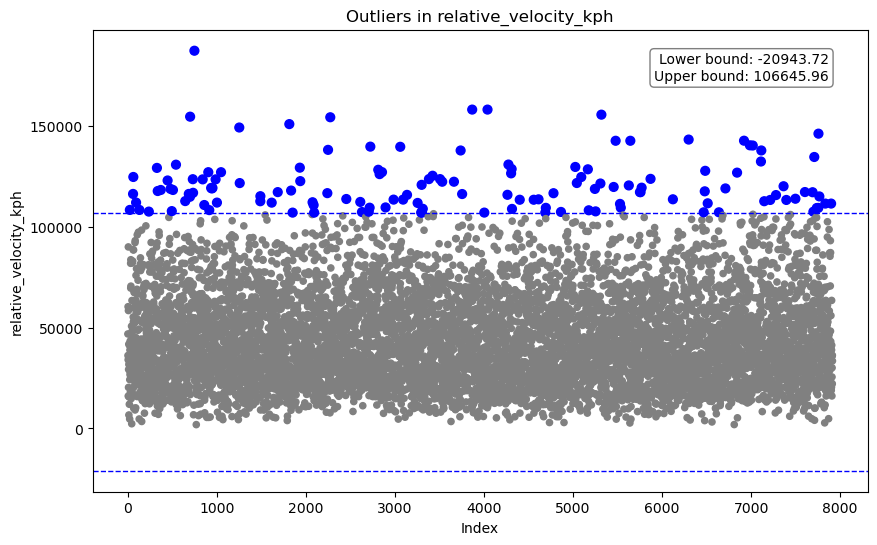

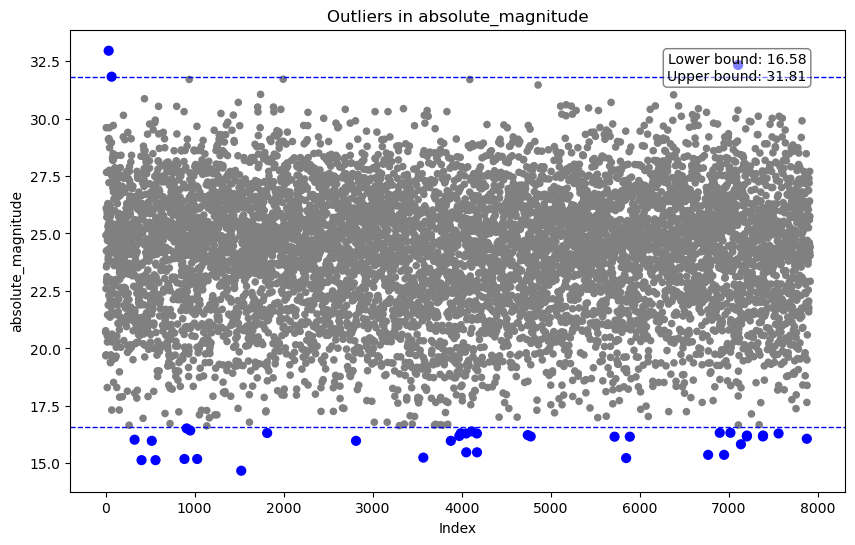

In [19]:
import matplotlib.pyplot as plt

# Define a function to plot outliers
def plot_outliers(column_name):
    # Calculate the IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

    # Plot the data
    plt.figure(figsize=(10, 6))
    colors = outliers.map({True: 'blue', False: 'grey'})
    sizes = outliers.map({True: 40, False: 20})
    plt.scatter(df.index, df[column_name], c=colors, s=sizes)
    
    # Add dashed lines for the bounds
    plt.axhline(y=lower_bound, color='blue', linestyle='--', linewidth=1)
    plt.axhline(y=upper_bound, color='blue', linestyle='--', linewidth=1)
    
    # Add a box with the bounds in the upper right corner
    textstr = f'Lower bound: {lower_bound:.2f}\nUpper bound: {upper_bound:.2f}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='right', bbox=props)
    
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.title(f'Outliers in {column_name}')
    plt.show()

# Plot outliers for relative_velocity_kph
plot_outliers('relative_velocity_kph')

# Plot outliers for absolute_magnitude
plot_outliers('absolute_magnitude')

In [20]:
# Remove outliers from the dataset
for column in columns_to_check:
    _, lower_bound, upper_bound = detect_outliers(df, column)
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]




**Further data intergrity validation:**

In [21]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Check for negative or implausible values in numerical columns
print("Negative relative_velocity_kph:", (df['relative_velocity_kph'] < 0).any())
print("Negative absolute_magnitude:", (df['absolute_magnitude'] < 0).any())

# Ensuring that boolean columns contain only True or False values in 'is_potentially_hazardous'
print(df['is_potentially_hazardous'].unique())

# Verify consistency between min and max diameters
inconsistent_diameters = df[df['estimated_diameter_min_km'] > df['estimated_diameter_max_km']]
print("Inconsistent diameter records:", len(inconsistent_diameters))

# Verify that dates are within a reasonable range
print("Minimum date:", df['close_approach_date'].min())
print("Maximum date:", df['close_approach_date'].max())




Number of duplicate rows: 977
Negative relative_velocity_kph: False
Negative absolute_magnitude: False
[ True False]
Inconsistent diameter records: 0
Minimum date: 2022-01-01 00:00:00
Maximum date: 2023-01-01 00:00:00


In [22]:
# Drop duplicates from the dataset
# Duplicate rows represent the same information multiple times, which can inflate metrics like averages, counts, and sums.
df = df.drop_duplicates()
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


Saving the cleaned data

In [23]:
df.to_csv('cleaned_asteroids_data.csv', index=False)


- Calculate the average size of the NEOs for each day.（You have to fetch the corresponding each day's NEO size information from "data" by writing your own code)

The average size of Neos per day is used by adding the min and max diameters and the dividing by two. This is done by each Neo and then the average is found for all Neos in a single day. 

In [24]:
# Calculate the average size of the NEOs for each day
# Here we use the average of the min and max estimated diameters as the size
df['average_diameter_km'] = (df['estimated_diameter_min_km'] + df['estimated_diameter_max_km']) / 2
average_size_per_day = df.groupby('close_approach_date')['average_diameter_km'].mean().reset_index()
average_size_per_day.columns = ['date', 'average_size']

# Sort the DataFrame by date
average_size_per_day.sort_values(by='date', inplace=True)

# Print the result
print(average_size_per_day)

          date  average_size
0   2022-01-01      0.161639
1   2022-01-02      0.113284
2   2022-01-03      0.030262
3   2022-01-04      0.080179
4   2022-01-05      0.188949
..         ...           ...
361 2022-12-28      0.087764
362 2022-12-29      0.153640
363 2022-12-30      0.137482
364 2022-12-31      0.042911
365 2023-01-01      0.199531

[366 rows x 2 columns]


- Determine the proportion of NEOs that are potentially hazardous.

To determine the proportion af potentially hazardous NEOs we count the number of potentially hazardous ones, and divides them with the total amount of NEOs. The numbers is shown in a pie chart below.

First Code Snippet - Hazardous Count: 415, Non-Hazardous Count: 6330


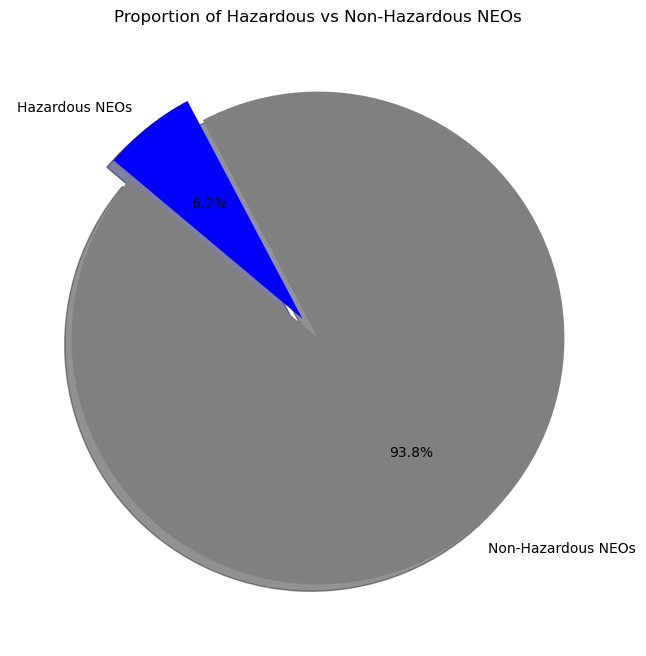

In [25]:
# Calculate the counts of hazardous and non-hazardous NEOs
hazardous_count = df['is_potentially_hazardous'].sum()
non_hazardous_count = len(df) - hazardous_count

print(f"First Code Snippet - Hazardous Count: {hazardous_count}, Non-Hazardous Count: {non_hazardous_count}")

# Create a pie chart
labels = ['Non-Hazardous NEOs', 'Hazardous NEOs']
sizes = [non_hazardous_count, hazardous_count]
colors = ['grey', 'blue']
explode = (0, 0.1)  # explode the 2nd slice (Hazardous NEOs)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Hazardous vs Non-Hazardous NEOs')
plt.show()

- Find the NEO with the closest approach distance for each day.

When looking at closest approach, it is the same as the lowest miss distance, and we sort that per day and print the list.

In [26]:
# Find the NEO with the closest approach distance for each day
closest_approach_per_day = df.loc[df.groupby('close_approach_date')['miss_distance_km'].idxmin()]

# Sort the DataFrame by date
closest_approach_per_day.sort_values(by='close_approach_date', inplace=True)

# Select only the columns 'id', 'name', 'close_approach_date', and 'miss_distance_km'
result = closest_approach_per_day[['id', 'name', 'close_approach_date']]

# Print the result
print(result)

            id        name close_approach_date
104   54235477  (2022 AJ1)          2022-01-01
122   54235525  (2022 AP1)          2022-01-02
38    54235463   (2022 AU)          2022-01-03
51    54235528  (2022 AT1)          2022-01-04
65    54235667  (2022 AS2)          2022-01-05
...        ...         ...                 ...
7752  54337704   (2023 AB)          2022-12-28
7828  54337572  (2022 YT6)          2022-12-29
7854  54336904  (2022 YG5)          2022-12-30
7844  54338714   (2023 AW)          2022-12-31
7895  54337425  (2022 YS6)          2023-01-01

[366 rows x 3 columns]


- Use statistical methods to analyze the data. Calculate the mean, median, mode, and standard deviation of the NEO sizes. Besides, define at least two other statistic and compute them for anlayzing the data further. 

To analyze the data we extract the following data (we have rounded the number to two decimal spaces, exact is shown below the code):
- Mean size: 0.13 - Average size of the neo is 0.13 km in diameter
- Median size: 0.05 - the middle number in all the data listed from smalles to largest, as we can see, the median is far smaller than the mean, meaning we have a lot of small Neos
- Mode size: 0.03 - The most common size in this dataset
- Standard deviation: 0.20 - The standard spread of the numbers from the mean
- Interquartile range (IQR): 0.11
- Skewness: 3.59
- Kurtosis: 16.58

In [27]:
from scipy import stats

# Calculate the average diameter for each NEO
df['average_diameter_km'] = (df['estimated_diameter_min_km'] + df['estimated_diameter_max_km']) / 2

# Calculate the mean of the NEO sizes
mean_size = df['average_diameter_km'].mean()
print(f"Mean size: {mean_size}")

# Calculate the median of the NEO sizes
median_size = df['average_diameter_km'].median()
print(f"Median size: {median_size}")

# Calculate the mode of the NEO sizes
mode_size = df['average_diameter_km'].mode()[0]
print(f"Mode size: {mode_size}")

# Calculate the standard deviation of the NEO sizes
std_dev_size = df['average_diameter_km'].std()
print(f"Standard deviation: {std_dev_size}")

# Calculate the interquartile range (IQR) of the NEO sizes
iqr_size = stats.iqr(df['average_diameter_km'])
print(f"Interquartile range (IQR): {iqr_size}")

# Calculate the skewness of the NEO sizes
skewness_size = df['average_diameter_km'].skew()
print(f"Skewness: {skewness_size}")

# Calculate the kurtosis of the NEO sizes
kurtosis_size = df['average_diameter_km'].kurtosis()
print(f"Kurtosis: {kurtosis_size}")

Mean size: 0.12881545544248332
Median size: 0.0541430375
Mode size: 0.0341619472
Standard deviation: 0.20095932432491856
Interquartile range (IQR): 0.11466132975000001
Skewness: 3.5890371593917396
Kurtosis: 16.579153523616654


- Use statistical methods to determine if the size of a NEO is correlated with whether it is potentially hazardous.

We use statistical calculations such as correlation coefficients, p-values and a chi-squared test to back up results.

In [28]:
from scipy.stats import pointbiserialr, chi2_contingency

# Calculate the average diameter for each NEO
df['average_diameter_km'] = (df['estimated_diameter_min_km'] + df['estimated_diameter_max_km']) / 2

# Calculate the point-biserial correlation coefficient
correlation, p_value = pointbiserialr(df['is_potentially_hazardous'], df['average_diameter_km'])
print(f"Point-biserial correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Perform a chi-squared test for independence
# Create a contingency table
contingency_table = pd.crosstab(df['is_potentially_hazardous'], df['average_diameter_km'] > df['average_diameter_km'].median())
chi2, chi2_p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test statistic: {chi2}")
print(f"Chi-squared p-value: {chi2_p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant correlation between NEO size and whether it is potentially hazardous.")
else:
    print("There is no statistically significant correlation between NEO size and whether it is potentially hazardous.")

if chi2_p_value < 0.05:
    print("The chi-squared test indicates a statistically significant association between NEO size and whether it is potentially hazardous.")
else:
    print("The chi-squared test indicates no statistically significant association between NEO size and whether it is potentially hazardous.")

Point-biserial correlation coefficient: 0.3438002212996729
P-value: 1.854912672453762e-186
Chi-squared test statistic: 440.21001197286046
Chi-squared p-value: 9.744050888134706e-98
There is a statistically significant correlation between NEO size and whether it is potentially hazardous.
The chi-squared test indicates a statistically significant association between NEO size and whether it is potentially hazardous.


The correlation coefficient of 0.34 together with a p-value of 2.31e-05 at a significance level of 0.05, means that there is a statistical correlation between size and hazardousness. However, this value relies on the large dataset entries of almost 8.000 values.

**Textbook Practice**: Make a visualization as an evidence for your conclusion on the hazardousness. Apply the principle of "choosing an effective visual" in Chapter 2 to make this visualization. You need to explain how the principles below are used for making this plot:
- "Choose an appropriate display" (Chapter 2)
- "Eliminate clutter" (Chapter 3)
- "Draw attention there you want it" (Chapter 4)
- "Think like a designer" (Chapter 5)

- "Choose an appropriate display" (Chapter 2)
    Simplicity
    Clear message
    If ony few numbers, consider not making a graph.
    Tables: should focus on the data, not the borders, perhaps highligting specific data by enhancing coloursaturation or background by making a heatmap (P.42)
    Scatterplots: Focus on coloursaturation to highligt data that should be the main focus. (P.45)
    Line graphs: Highlight the graph that is the focus. (P.46)
    Bar plots: Emphasize on data by changing the baseline from 0 to a number closer to the lowest bar. This is not the accurate visualisation, but a very impactful way to emphasize differences:
- "Eliminate clutter" (Chapter 3)
    Refers to any visual components that do not add informative value and can distract the audience from the core message
        Remove non-essential elements: Excessive gridlines, borders and backgrounds
        Simplifying axes and labels: Reduce number of tick-marks
        Use colour wisely, only applied wheredata is important, the rest is showed in a more neutral or ligther colour.
- "Draw attention there you want it" (Chapter 4)
    Strategically using visual elements to draw attention to the message we want out
        Use colour, siza and position to draw attention.
        Create a hierachy by adjusting colour intensity, size or placement.
- "Think like a designer" (Chapter 5)
    Use colour and design enhance clarity
        Using colours that does not affect colourblinds
        Do not use too many colours
        Use colour and design that complies with the sender and message.

Definition from AI:

Definition of Potentially Hazardous Asteroid (PHA)
A Potentially Hazardous Asteroid (PHA) is defined based on parameters that measure the asteroid's potential to make threatening close approaches to the Earth. Specifically, an asteroid is considered potentially hazardous if it meets the following criteria:

Minimum Orbit Intersection Distance (MOID): The asteroid's orbit comes within 0.05 astronomical units (AU) of Earth's orbit.
Absolute Magnitude (H): The asteroid has an absolute magnitude of 22.0 or brighter (which corresponds to a diameter of approximately 140 meters or larger).

We try again with looking at plots to back up the correlation.

Number of hazardous NEOs: 415
Number of non-hazardous NEOs: 6330
Total number of NEOs: 6745


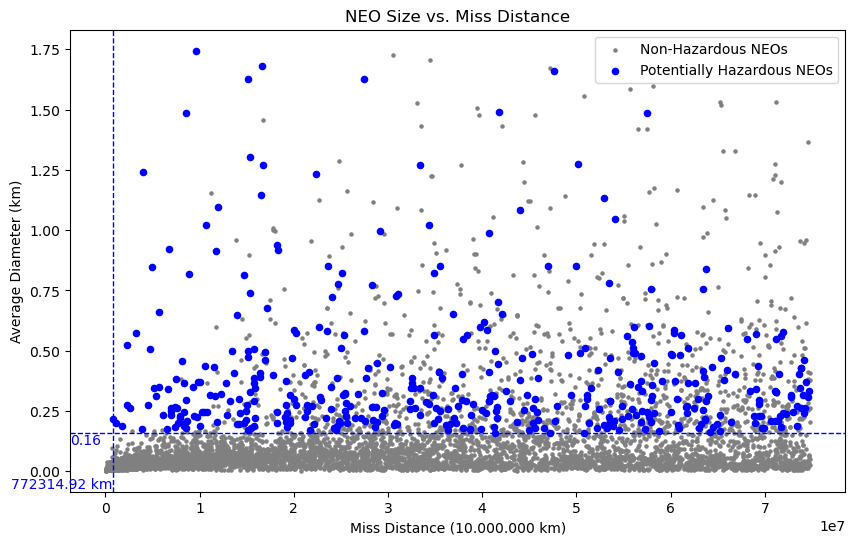

In [29]:
import matplotlib.pyplot as plt

# Calculate the average diameter for each NEO
df['average_diameter_km'] = (df['estimated_diameter_min_km'] + df['estimated_diameter_max_km']) / 2

# Filter the DataFrame for potentially hazardous and non-hazardous NEOs
hazardous_df = df[df['is_potentially_hazardous']]
non_hazardous_df = df[~df['is_potentially_hazardous']]

# Print the number of data points
print(f"Number of hazardous NEOs: {len(hazardous_df)}")
print(f"Number of non-hazardous NEOs: {len(non_hazardous_df)}")
print(f"Total number of NEOs: {len(df)}")

# Find the minimum values for hazardous NEOs
min_miss_distance_hazardous = hazardous_df['miss_distance_km'].min()
min_diameter_hazardous = hazardous_df['average_diameter_km'].min()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot non-hazardous NEOs in grey
plt.scatter(non_hazardous_df['miss_distance_km'], non_hazardous_df['average_diameter_km'], c='grey', s=5, label='Non-Hazardous NEOs')

# Plot potentially hazardous NEOs in blue
plt.scatter(hazardous_df['miss_distance_km'], hazardous_df['average_diameter_km'], c='blue', s=20, label='Potentially Hazardous NEOs')

# Add dashed lines for the minimum values
plt.axvline(x=min_miss_distance_hazardous, color='blue', linestyle='--', linewidth=1)
plt.axhline(y=min_diameter_hazardous, color='blue', linestyle='--', linewidth=1)

# Add text annotations for the minimum values
plt.text(min_miss_distance_hazardous, plt.ylim()[0], f'{min_miss_distance_hazardous:.2f} km', color='blue', ha='right', va='bottom')
plt.text(plt.xlim()[0], min_diameter_hazardous, f'{min_diameter_hazardous:.2f}', color='blue', ha='left', va='top')

# Add labels and title
plt.xlabel('Miss Distance (10.000.000 km)')
plt.ylabel('Average Diameter (km)')
plt.title('NEO Size vs. Miss Distance')
plt.legend()

# Show the plot
plt.show()

Number of hazardous NEOs: 415
Number of non-hazardous NEOs: 6330
Total number of NEOs: 6745


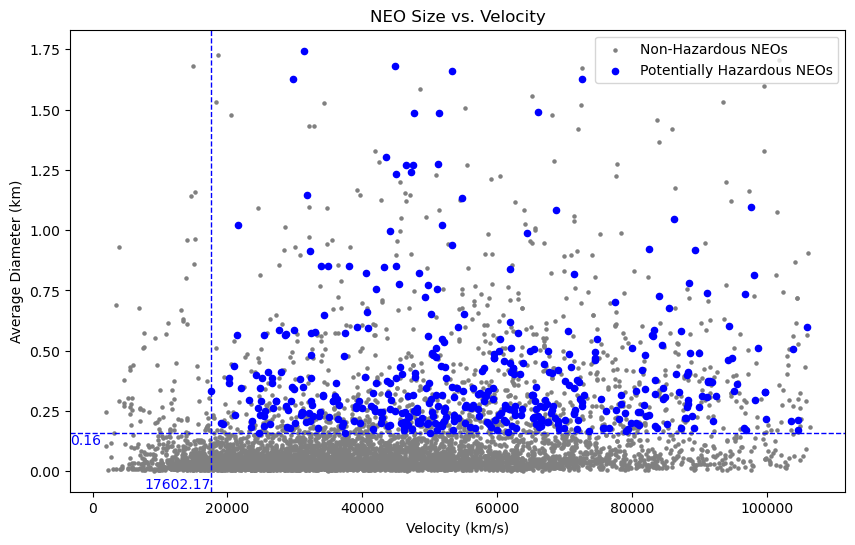

In [30]:
# Calculate the average diameter for each NEO
df['average_diameter_km'] = (df['estimated_diameter_min_km'] + df['estimated_diameter_max_km']) / 2

# Filter the DataFrame for potentially hazardous and non-hazardous NEOs
hazardous_df = df[df['is_potentially_hazardous']]
non_hazardous_df = df[~df['is_potentially_hazardous']]

# Print the number of data points
print(f"Number of hazardous NEOs: {len(hazardous_df)}")
print(f"Number of non-hazardous NEOs: {len(non_hazardous_df)}")
print(f"Total number of NEOs: {len(df)}")
# Find the minimum values for hazardous NEOs
min_velocity_hazardous = hazardous_df['relative_velocity_kph'].min()
min_diameter_hazardous = hazardous_df['average_diameter_km'].min()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot non-hazardous NEOs in grey
plt.scatter(non_hazardous_df['relative_velocity_kph'], non_hazardous_df['average_diameter_km'], c='grey', s=5, label='Non-Hazardous NEOs')

# Plot potentially hazardous NEOs in blue
plt.scatter(hazardous_df['relative_velocity_kph'], hazardous_df['average_diameter_km'], c='blue', s=20, label='Potentially Hazardous NEOs')

# Add dashed lines for the minimum values
plt.axvline(x=min_velocity_hazardous, color='blue', linestyle='--', linewidth=1)
plt.axhline(y=min_diameter_hazardous, color='blue', linestyle='--', linewidth=1)

# Add text annotations for the minimum values
plt.text(min_velocity_hazardous, plt.ylim()[0], f'{min_velocity_hazardous:.2f}', color='blue', ha='right', va='bottom')
plt.text(plt.xlim()[0], min_diameter_hazardous, f'{min_diameter_hazardous:.2f}', color='blue', ha='left', va='top')

# Add labels and title
plt.xlabel('Velocity (km/s)')
plt.ylabel('Average Diameter (km)')
plt.title('NEO Size vs. Velocity')
plt.legend()

# Show the plot
plt.show()

### Task 3: Data Visualization Part A

- Create a line plot of the number of NEOs per week.
- Create a histogram of the distribution of NEO sizes.
- Create a bar plot of the average NEO size per week.
- Use a library like Seaborn to create more complex visualizations, such as a box plot of the NEO sizes or a heat map of the number of NEOs per week. **Be creative**!

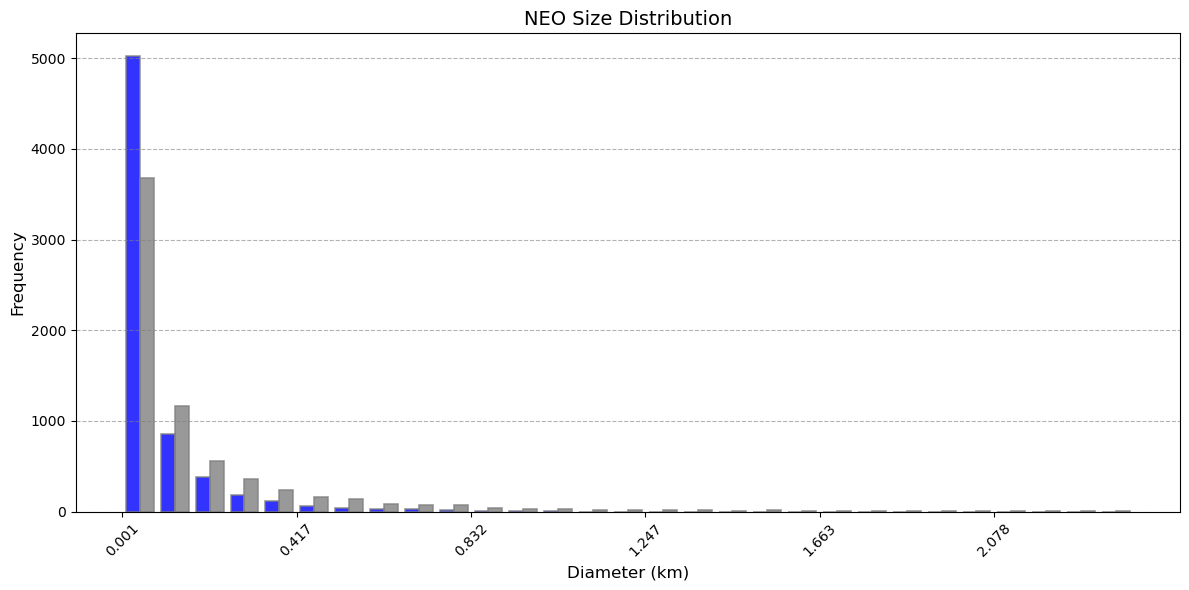

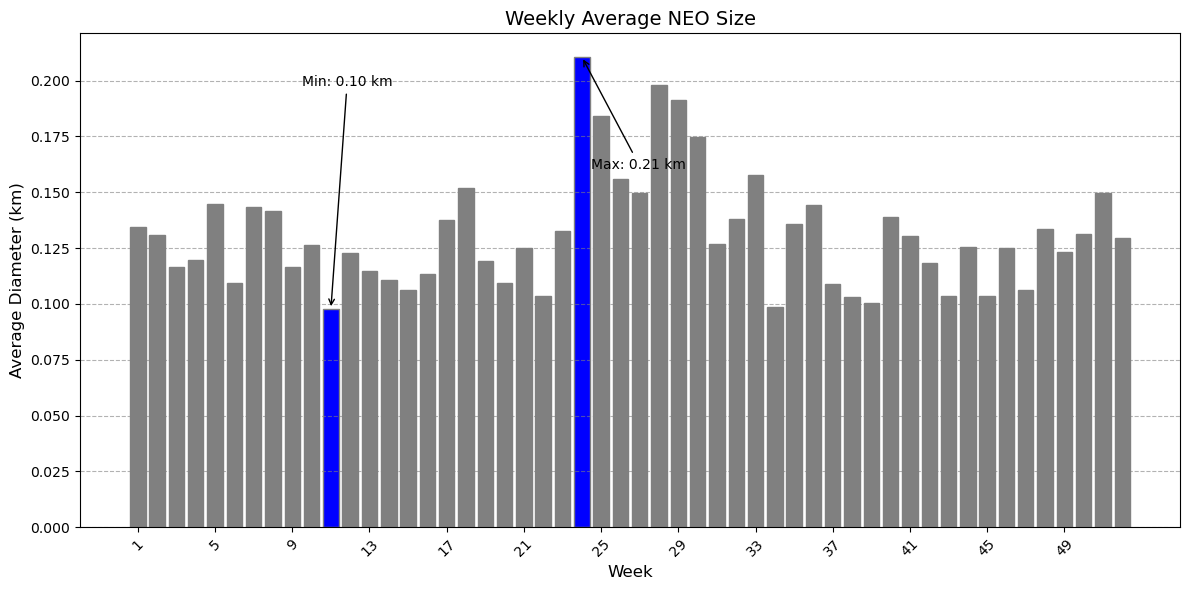

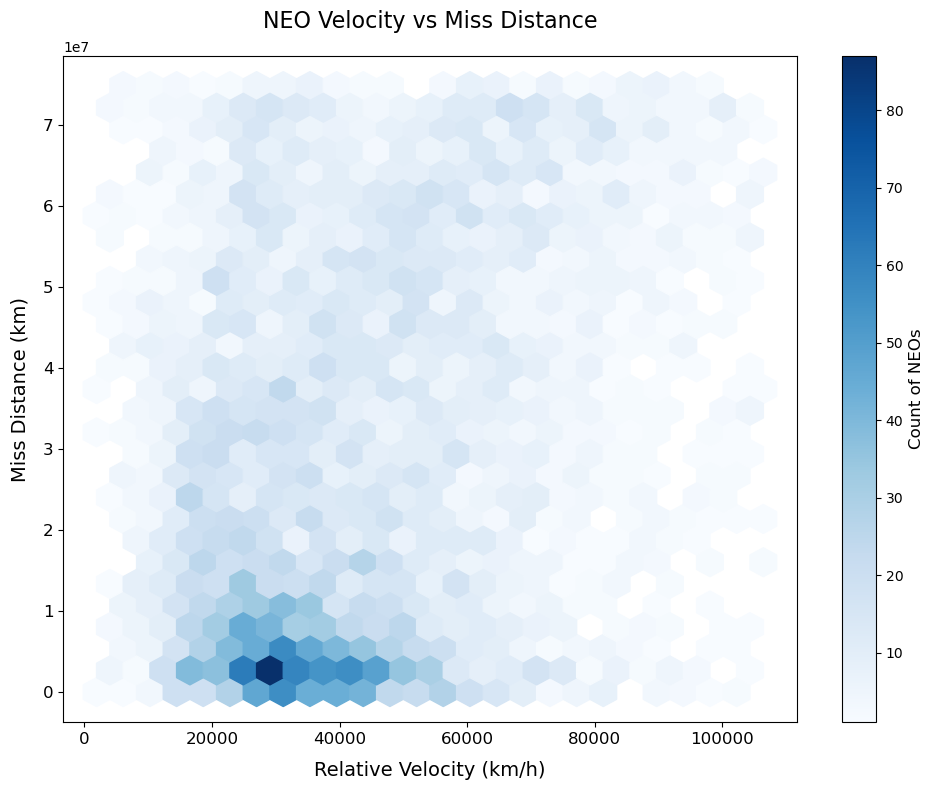

In [31]:
import plotly.express as px
import numpy as np

# Trend of Near-Earth Objects (NEOs) over time
# Create 'week' column
df['week'] = df['close_approach_date'].dt.isocalendar().week


# Weekly Aggregations
neos_per_week = df.groupby('week').size().reset_index(name='count')
average_size_per_week = df.groupby('week')['average_diameter_km'].mean().reset_index()

# Identify Peak and Lowest Weeks
peak_week = neos_per_week.loc[neos_per_week['count'].idxmax()]
lowest_week = neos_per_week.loc[neos_per_week['count'].idxmin()]
max_week = average_size_per_week.loc[average_size_per_week['average_diameter_km'].idxmax()]
min_week = average_size_per_week.loc[average_size_per_week['average_diameter_km'].idxmin()]

fig_line = px.line(neos_per_week, 
                   x='week', 
                   y='count', 
                   title='Weekly Trend of Near-Earth Objects (NEOs)',
                   labels={'week': 'Week', 'count': 'Number of NEOs'},
                   template='simple_white',
                   color_discrete_sequence=['blue'])

# Add Annotations for Peak and Lowest Points
fig_line.add_annotation(
    x=peak_week['week'], y=peak_week['count'],
    text=f"Peak: {peak_week['count']} NEOs",
    showarrow=True, arrowhead=2, ax=20, ay=-30, bgcolor='white', font=dict(size=12)
)

fig_line.add_annotation(
    x=lowest_week['week'], y=lowest_week['count'],
    text=f"Lowest: {lowest_week['count']} NEOs",
    showarrow=True, arrowhead=2, ax=-20, ay=30, bgcolor='white', font=dict(size=12)
)

# Customize Layout
fig_line.update_traces(line=dict(color='blue', width=3))
fig_line.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    yaxis=dict(title='Number of NEOs', gridcolor='grey'),
    margin=dict(t=50, l=50, r=50, b=50),
    showlegend=False
)

fig_line.show()


# Histogram: Distribution of NEO Sizes
plt.figure(figsize=(12, 6))
bins = np.linspace(df['estimated_diameter_min_km'].min(), df['estimated_diameter_max_km'].max(), 30)
plt.hist([df['estimated_diameter_min_km'], df['estimated_diameter_max_km']], 
         bins=bins, alpha=0.8, label=['Min', 'Max'], 
         histtype='bar', edgecolor='grey', linewidth=1.2, color=['blue', 'grey'])

# Simplified Insights
plt.annotate('Majority of NEOs\nare small', xy=(0.5, 6000), xytext=(1.5, 6500),
             arrowprops=dict(facecolor='grey', arrowstyle='->'), fontsize=10)
plt.annotate('Few larger NEOs\ndominate the tail', xy=(3, 100), xytext=(4.5, 2000),
             arrowprops=dict(facecolor='grey', arrowstyle='->'), fontsize=10)

plt.title('NEO Size Distribution', fontsize=14)
plt.xlabel('Diameter (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(bins[::5], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6, color='grey')
plt.tight_layout()
plt.show()

# Bar Plot: Weekly Average NEO Size
plt.figure(figsize=(12, 6))

# Color bars based on max and min weeks
colors = ['blue' if x == max_week['week'] or x == min_week['week'] else 'grey' 
          for x in average_size_per_week['week']]

# Bar plot
bars = plt.bar(average_size_per_week['week'], 
               average_size_per_week['average_diameter_km'], 
               color=colors, 
               edgecolor='grey')

# Simplified Labels
plt.annotate(f'Max: {max_week["average_diameter_km"]:.2f} km',
             xy=(max_week['week'], max_week['average_diameter_km']),
             xytext=(max_week['week'] + 0.5, max_week['average_diameter_km'] - 0.05),
             arrowprops=dict(facecolor='grey', arrowstyle='->'), fontsize=10)

plt.annotate(f'Min: {min_week["average_diameter_km"]:.2f} km',
             xy=(min_week['week'], min_week['average_diameter_km']),
             xytext=(min_week['week'] - 1.5, min_week['average_diameter_km'] + 0.1),
             arrowprops=dict(facecolor='grey', arrowstyle='->'), fontsize=10)

# Title and axis labels
plt.title('Weekly Average NEO Size', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Diameter (km)', fontsize=12)

# Ticks: Format week numbers directly (integers)
plt.xticks(average_size_per_week['week'][::4], rotation=45)

# Grid and layout adjustments
plt.grid(axis='y', linestyle='--', alpha=0.6, color='grey')
plt.tight_layout()

# Show the plot
plt.show()


# Calculate percentage change for better insights (optional)
neos_per_week['percentage_of_total'] = (neos_per_week['count'] / neos_per_week['count'].sum()) * 100

# Key Metrics
peak_week = neos_per_week.loc[neos_per_week['count'].idxmax()]
lowest_week = neos_per_week.loc[neos_per_week['count'].idxmin()]

# Title and Subtitle
title_text = f"Weekly Trend of Near-Earth Objects (NEOs)\nHighlighting Peak and Lowest Activity Periods"


# Convert columns to numeric types
df['relative_velocity_kph'] = pd.to_numeric(df['relative_velocity_kph'], errors='coerce')
df['miss_distance_km'] = pd.to_numeric(df['miss_distance_km'], errors='coerce')

# Prepare data for hexbin plot
x = df['relative_velocity_kph']
y = df['miss_distance_km']

# Create the hexbin plot
plt.figure(figsize=(10, 8))
hb = plt.hexbin(
    x, 
    y, 
    gridsize=25,  # Adjust the grid size for hexagonal bins
    cmap='Blues',  # Use a blue colormap
    mincnt=1,  # Only display bins with at least 1 point
)

# Add colorbar to indicate counts
cb = plt.colorbar(hb)
cb.set_label('Count of NEOs', fontsize=12)

# Simplify labels and add a clear title
plt.title('NEO Velocity vs Miss Distance', fontsize=16, pad=20)
plt.xlabel('Relative Velocity (km/h)', fontsize=14, labelpad=10)
plt.ylabel('Miss Distance (km)', fontsize=14, labelpad=10)

# Simplify the plot by removing excess ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)  # Remove gridlines to focus on data

# Display the plot
plt.tight_layout()
plt.show()




**Textbook Practice**: You need to explain how the principles below are used for making this plot:
- "Choose an appropriate display" (Chapter 2)
- "Eliminate clutter" (Chapter 3)

**Answer:**
- No gridlines to focus on the hexagonal bins. 
- Single colourmap (blue) to fit the theme.
- No uneccesary labels pointing to high / low density areas
- The heatmap, with a low bin count (25) prevents overplotting. It allows for easy understanding of the relationship between Relative velocity and miss_distance emphasizing this is a explanatory diagram instead of exploratory.

### Task 4: Data Visualization Part B

- Create a pie chart of the proportion of hazardous vs non-hazardous NEOs.

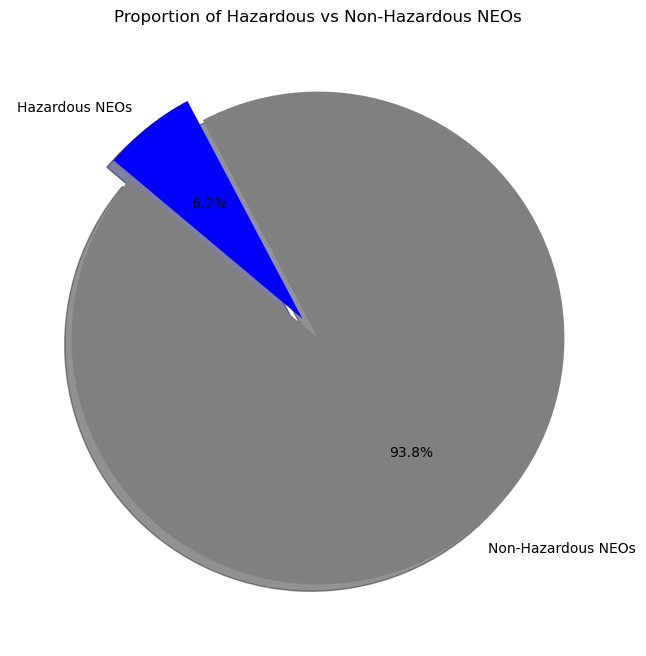

In [32]:
# Calculate the counts of hazardous and non-hazardous NEOs
hazardous_count = df['is_potentially_hazardous'].sum()
non_hazardous_count = len(df) - hazardous_count

# Create a pie chart
labels = ['Non-Hazardous NEOs', 'Hazardous NEOs']
sizes = [non_hazardous_count, hazardous_count]
colors = ['grey', 'blue']
explode = (0, 0.1)  # explode the 2nd slice (Hazardous NEOs)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Hazardous vs Non-Hazardous NEOs')
plt.show()

- Create a scatter plot of the correlation between NEO size and close approach distance.

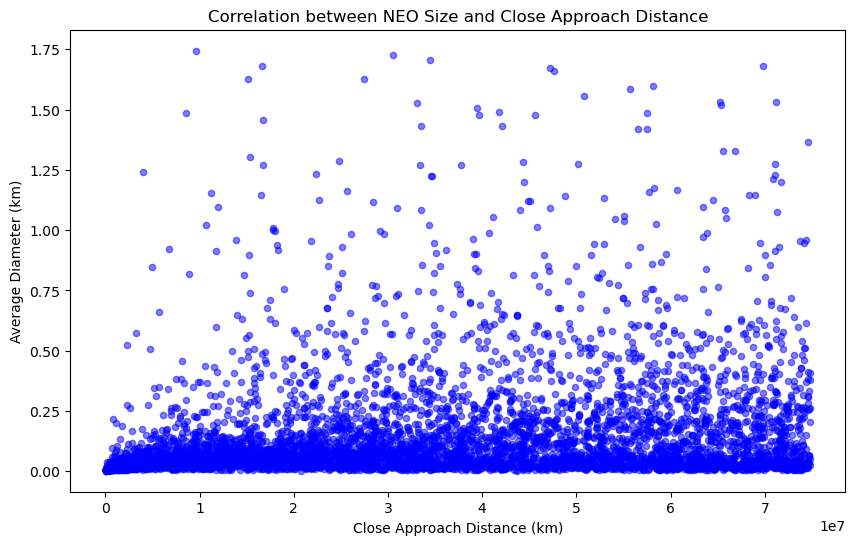

In [33]:
# Calculate the average diameter for each NEO
df['average_diameter_km'] = (df['estimated_diameter_min_km'] + df['estimated_diameter_max_km']) / 2

# Plot the data
plt.figure(figsize=(10, 6))

# Scatter plot of NEO size vs. close approach distance
plt.scatter(df['miss_distance_km'], df['average_diameter_km'], c='blue', s=20, alpha=0.5)

# Add labels and title
plt.xlabel('Close Approach Distance (km)')
plt.ylabel('Average Diameter (km)')
plt.title('Correlation between NEO Size and Close Approach Distance')

# Show the plot
plt.show()

- Customize the appearance of your plots (e.g., colors, labels, titles).

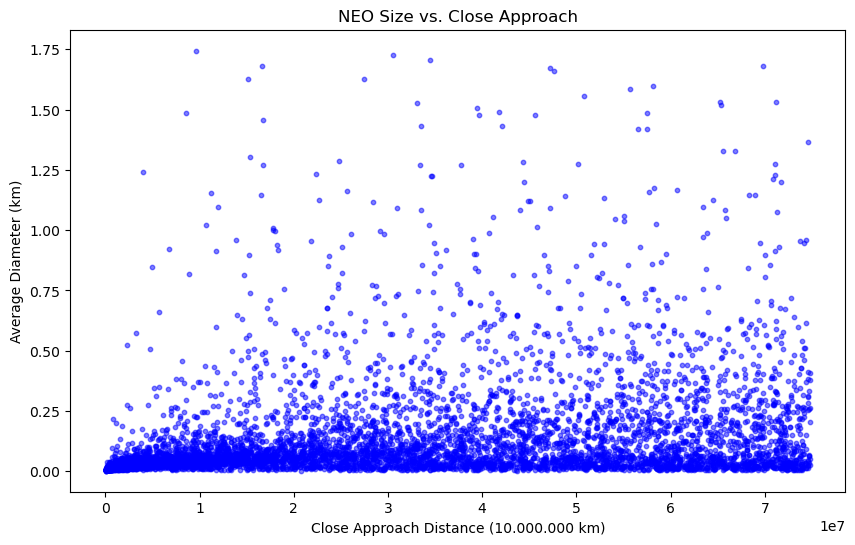

In [34]:
# Calculate the average diameter for each NEO
df['average_diameter_km'] = (df['estimated_diameter_min_km'] + df['estimated_diameter_max_km']) / 2

# Plot the data
plt.figure(figsize=(10, 6))

# Scatter plot of NEO size vs. close approach distance
plt.scatter(df['miss_distance_km'], df['average_diameter_km'], c='blue', s=10, alpha=0.5)

# Add labels and title
plt.xlabel('Close Approach Distance (10.000.000 km)')
plt.ylabel('Average Diameter (km)')
plt.title('NEO Size vs. Close Approach')

# Show the plot
plt.show()

- Create interactive visualizations using a library like Plotly. For example, create an interactive scatter plot where you can hover over each point to see more information about the NEO. **Be creative!**

In [35]:
# Convert 'is_potentially_hazardous' to boolean if it is not already
df['is_potentially_hazardous'] = df['is_potentially_hazardous'].astype(bool)

# Create a size column for the plot, halving the size for non-hazardous NEOs
df['size'] = np.where(df['is_potentially_hazardous'], 7, 1)

# Create a 'day_of_year' column
df['day_of_year'] = df['close_approach_date'].dt.dayofyear

# Create the polar plot
fig = px.scatter_polar(
    df,
    r='miss_distance_km',
    theta='day_of_year',
    color='is_potentially_hazardous',
    size='size',
    hover_data=['name', 'id', 'miss_distance_km', 'average_diameter_km'],
    labels={'miss_distance_km': 'Miss Distance (km)', 'day_of_year': 'Day of Year', 'is_potentially_hazardous': 'Potentially hazardous NEOs'},
    title='NEOs Around Earth',
    color_discrete_map={True: 'blue', False: 'grey'},
    category_orders={'is_potentially_hazardous': [True, False]}
)

# Update the legend names
fig.for_each_trace(lambda t: t.update(name='Yes' if t.name == 'True' else 'No'))

# Update the layout for better visualization
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    polar=dict(
        radialaxis=dict(showgrid=True, gridcolor='black', showline=True, linecolor='black', range=[0, df['miss_distance_km'].max() / 2]),
        angularaxis=dict(
            showgrid=True,
            gridcolor='black',
            showline=True,
            linecolor='black',
            tickmode='array',
            tickvals=[15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345],
            ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        )
    ),
    plot_bgcolor='white'
)

# Show the plot
fig.show()


**Textbook Practice**: You need to explain how the principle "Draw attention there you want it" (Chapter 4) is applied for making all the visualizations.

In [36]:
# Write your code or/and markdowns

### Task 5: Interpretation of Results

- Interpret the results of your data visualization in part A and B. 
- What insights can you gain about NEOs from your results? Summarizing your main findings with a single visualization plot. **Textbook Practice**: You need to explain how the principles below are used for making this plot:
  - "Choose an appropriate display" (Chapter 2)
  - "Eliminate clutter" (Chapter 3)
  - "Draw attention there you want it" (Chapter 4)
  - "Think like a designer" (Chapter 5)

- Use your findings to make predictions or recommendations. For example, if you found that larger NEOs are more likely to be potentially hazardous, you could recommend that more resources be allocated to tracking large NEOs. **Be creative!**
- Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5. You don't have to implement it, you just need to justify in this notebook why the method in the scientific paper could contribute in analysis or interpretation of the results.

In [37]:
# Write your code and markdowns